In [1]:
from training.config_training import config

In [14]:
import numpy as np
import pandas
import os

In [29]:
patient_id =  '012'# '0015ceb851d7251b8f399e39779d1e7d'
filename = 'F:\\LargeFiles\\lfz\\prep_result\\' + patient_id + '_label.npy'

In [30]:
label = np.load(filename)
label

array([[103.640012, 132.75    ,  97.67    ,  10.466   ]])

In [3]:
import os.path
os.path.isfile(filename) 

True

In [4]:
import SimpleITK

In [18]:
mhd_file = 'E:\\SW_WS\\github_SW\\kaggle_ndsb2017\\luna_raw\\subset1\\1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866.mhd'
itk_img = SimpleITK.ReadImage(mhd_file)

In [19]:
mhd_file = 'E:\\SW_WS\\github_SW\\kaggle_ndsb2017\\luna_raw\\subset1\\1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866.mhd'
itk_img = SimpleITK.ReadImage(mhd_file)

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000001E2997B3B40> >

In [20]:
mhd_file = 'F:\\LargeFiles\\lfz\\luna\\allset\\006.mhd'
mhd_file = 'F:\\LargeFiles\\lfz\\luna\\seg-lungs-LUNA16\\006.mhd'
itk_img = SimpleITK.ReadImage(mhd_file)

In [2]:
luna_segment = config['luna_segment']
savepath = config['preprocess_result_path']
luna_data = config['luna_data']
luna_label = config['luna_label']

In [3]:
luna_label

'./detector/labels/lunaqualified.csv'

In [15]:
luna_label_csv = os.path.join(os.getcwd(), 'training', luna_label)

In [16]:
annos = np.array(pandas.read_csv(luna_label_csv))

In [19]:
filelist = [f.split('.mhd')[0] for f in os.listdir(luna_data) if f.endswith('.mhd') ]
filelist

['006', '012', '020', '025', '029', '038', '040', '059', '079', '080']

In [30]:
# Check for all annotations related to our subset of LUNA16 datasets(a subset of patients scans).
for anno in annos:
    if str(int(anno[0])).zfill(3) in filelist:
        print (anno)

[  12.    -124.83   127.25  -473.06    10.466]
[  20.     -57.087   74.259 1790.5     13.694]
[  40.     -127.53    -29.608  -253.7       8.2693]
[  40.       93.139    -5.6526 -213.91      6.2098]
[  79.       69.529   -24.415  -137.82      7.0358]
[  80.     -99.859   37.434 -170.46    12.319]
[  80.     -78.667   66.422 -168.87    13.025]


In [34]:
luna_segment

'F:\\LargeFiles\\lfz\\luna\\seg-lungs-LUNA16\\'

In [35]:
luna_data

'F:\\LargeFiles\\lfz\\luna\\allset'

## Visualize preprocessed Luna16 datasets

In [4]:
import matplotlib
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [5]:
import numpy as np
base = 'F:\\LargeFiles\\lfz\\prep_result\\'
patient_id = '020'
img = np.load(base+ patient_id +'_clean.npy')
# A list of annotations. each annotation in (z, y, x, r) order, floating point number.
label = np.load(base+ patient_id +'_label.npy')

In [6]:
img.shape

(1, 277, 187, 273)

In [10]:
label

array([[142.5     , 100.289941,  47.72925 ,  13.694   ]])

In [7]:
# Take the first annotation if any.
box = label[0]
# Convert the floating point numbers to integer.
box = box.astype(int)

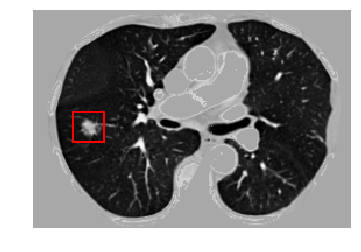

In [8]:
ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]],'gray') # slice by z axis of the box - box[0].
plt.axis('off')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)

In [32]:
c = [  20. ,    -57.087  , 74.259 ,1790.5   ,  13.694]
c[1:4]

[-57.087, 74.259, 1790.5]

In [33]:
patches.Rectangle?